# Boston meets Seattle

First read in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns

%matplotlib inline

#loading seattle dataset
df_s_cal = pd.read_csv('seattle_calendar.csv')
df_s_lis = pd.read_csv('seattle_listings.csv')
df_s_rev = pd.read_csv('seattle_reviews.csv')

#loading boston dataset
df_b_cal = pd.read_csv('boston_calendar.csv')
df_b_lis = pd.read_csv('boston_listings.csv')
df_b_rev = pd.read_csv('boston_reviews.csv')

#### Data preparation

Create a season column for the Calendar dataset

In [2]:
def create_season_column(df):
    df["date_month"] = df["date"].apply(lambda x: int(x.split("-")[1]))
    # create a list of conditions
    conditions = [
        (df['date_month'] == 12) | (df['date_month'] == 1) | (df['date_month'] == 2),
        (df['date_month'] == 3) | (df['date_month'] == 4) | (df['date_month'] == 5),
        (df['date_month'] == 6) | (df['date_month'] == 7) | (df['date_month'] == 8),
        (df['date_month'] == 9) | (df['date_month'] == 10) | (df['date_month'] == 11)
        ]

    # create a list of the values we want to assign for each condition
    values = ['winter', 'spring', 'summer', 'fall']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['season'] = np.select(conditions, values)
    
    return df

Convert String Columns for quantitative data into float values

In [3]:
def make_col_to_float(df, colname):
    for c in colname:
        new_colname = c + "_float"
        df[new_colname] = df[c].str.replace('$', '')
        df[new_colname] = df[new_colname].str.replace(',', '').astype(float)    
    return df

Calendar, including listing id and the price and availability for that day

In [4]:
df_b_cal_new = create_season_column(df_b_cal)
df_s_cal_new = create_season_column(df_s_cal)

In [5]:
df_b_cal_new = df_b_cal_new.dropna()
df_s_cal_new = df_s_cal_new.dropna()

In [6]:
df_b_cal_new.columns

Index(['listing_id', 'date', 'available', 'price', 'date_month', 'season'], dtype='object')

In [8]:
col_list2 = ['price']

make_col_to_float(df_b_cal_new, col_list2)
make_col_to_float(df_s_cal_new, col_list2)

df_b_cal_new.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,listing_id,date,available,price,date_month,season,price_float
365,3075044,2017-08-22,t,$65.00,8,summer,65.0
366,3075044,2017-08-21,t,$65.00,8,summer,65.0
367,3075044,2017-08-20,t,$65.00,8,summer,65.0
368,3075044,2017-08-19,t,$75.00,8,summer,75.0
369,3075044,2017-08-18,t,$75.00,8,summer,75.0


In [9]:
df_price_per_listing = df_b_cal_new.groupby(['listing_id']).mean()['price_float'].sort_values()
df_price_per_listing.head()

listing_id
12736032    11.000000
14867747    20.000000
14682145    25.000000
12074204    27.000000
8238078     28.410959
Name: price_float, dtype: float64

In [10]:
df_b_cal_new.groupby(['season']).mean()['price_float'].sort_values()

season
winter    185.526118
spring    190.750467
summer    200.851331
fall      221.338727
Name: price_float, dtype: float64

In [11]:
df_s_cal_new.groupby(['season']).mean()['price_float'].sort_values()

season
winter    128.902512
spring    134.319972
fall      138.568122
summer    150.045546
Name: price_float, dtype: float64

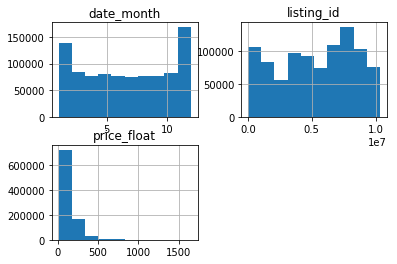

In [12]:
df_s_cal_new.hist();

#### Listing data
Selecting most interesting columns from big dataset

In [31]:
df_b_lis_edit = df_b_lis[['space','description','city','host_is_superhost', 'property_type', 'square_feet',
       'price', 'weekly_price', 'monthly_price',
       'cleaning_fee', 'number_of_reviews', 'review_scores_value']]

df_s_lis_edit = df_s_lis[['space','description','city','host_is_superhost', 'property_type', 'square_feet',
       'price', 'weekly_price', 'monthly_price',
       'cleaning_fee', 'number_of_reviews', 'review_scores_value']]

Convert numeric columns to float values with implemented function make_col_to_float

In [32]:
col_list1 = ["price","weekly_price","monthly_price","cleaning_fee"]

make_col_to_float(df_b_lis_edit, col_list1)
make_col_to_float(df_s_lis_edit, col_list1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,space,description,city,host_is_superhost,property_type,square_feet,price,weekly_price,monthly_price,cleaning_fee,number_of_reviews,review_scores_value,price_float,weekly_price_float,monthly_price_float,cleaning_fee_float
0,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,Seattle,f,Apartment,NaN,$85.00,NaN,NaN,NaN,207,10.0,85.0,NaN,NaN,NaN
1,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,Seattle,t,Apartment,NaN,$150.00,"$1,000.00","$3,000.00",$40.00,43,10.0,150.0,1000.0,3000.0,40.0
2,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Seattle,f,House,NaN,$975.00,NaN,NaN,$300.00,20,10.0,975.0,NaN,NaN,300.0
3,NaN,A charming apartment that sits atop Queen Anne...,Seattle,f,Apartment,NaN,$100.00,$650.00,"$2,300.00",NaN,0,NaN,100.0,650.0,2300.0,NaN
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Seattle,f,House,NaN,$450.00,NaN,NaN,$125.00,38,9.0,450.0,NaN,NaN,125.0
5,If you include a bit of your background in you...,We're renting out a small private unit of one ...,Seattle,f,House,NaN,$120.00,$800.00,NaN,$40.00,17,10.0,120.0,800.0,NaN,40.0
6,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Seattle,t,House,NaN,$80.00,$575.00,NaN,NaN,58,10.0,80.0,575.0,NaN,NaN
7,"This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",Seattle,t,Cabin,NaN,$60.00,$360.00,NaN,$25.00,173,10.0,60.0,360.0,NaN,25.0
8,"Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",Seattle,f,Apartment,NaN,$90.00,$500.00,"$1,700.00",NaN,8,10.0,90.0,500.0,1700.0,NaN
9,What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",Seattle,t,Apartment,NaN,$150.00,"$1,000.00","$3,000.00",$40.00,32,9.0,150.0,1000.0,3000.0,40.0


Delete old numeric columns and use newly created _float columns

In [33]:
df_b_lis_edit = df_b_lis_edit[['space','description','city','host_is_superhost', 'property_type', 'square_feet',
       'price_float', 'weekly_price_float', 'monthly_price_float',
       'cleaning_fee_float', 'number_of_reviews', 'review_scores_value']]

df_s_lis_edit = df_s_lis_edit[['space','description','city','host_is_superhost', 'property_type', 'square_feet',
       'price_float', 'weekly_price_float', 'monthly_price_float',
       'cleaning_fee_float', 'number_of_reviews', 'review_scores_value']]

Fill null items of float and int columns with mean of column

In [47]:
#boston
num_vars = df_b_lis_edit.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_b_lis_edit[col].fillna((df_b_lis_edit[col].mean()), inplace=True)

In [46]:
#seattle
num_vars = df_s_lis_edit.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_s_lis_edit[col].fillna((df_s_lis_edit[col].mean()), inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Histogram of Bostons metrics

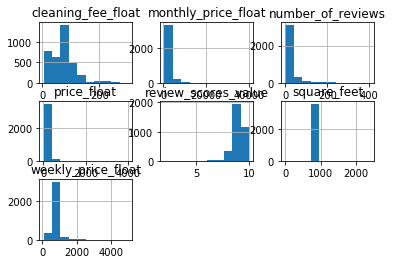

In [80]:
df_b_lis_edit.hist();

Histogram of Bostons metrics

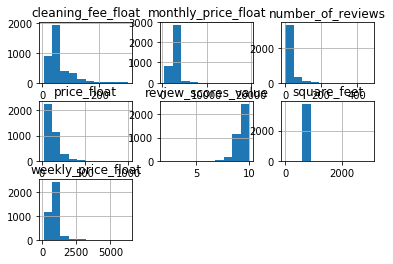

In [81]:
df_s_lis_edit.hist();

Heatmap of Seattle metrics

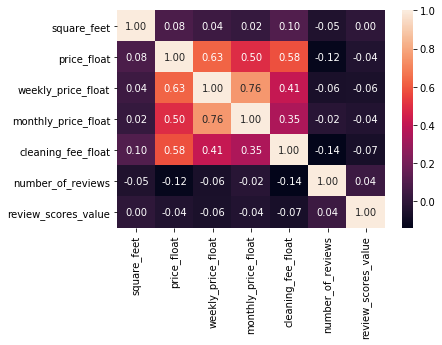

In [78]:
sns.heatmap(df_s_lis_edit.corr(), annot=True, fmt=".2f");

Heatmap of Bostons metrics

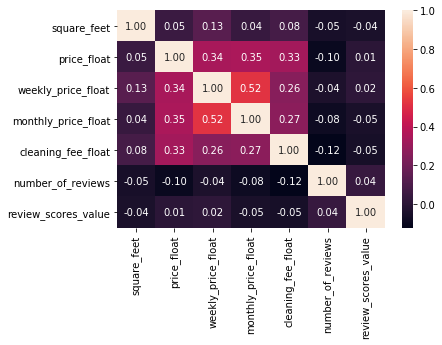

In [82]:
sns.heatmap(df_b_lis_edit.corr(), annot=True, fmt=".2f");

In [48]:
df_b_lis_edit.groupby(['property_type']).mean()['price_float'].sort_values()

property_type
Camper/RV           60.000000
Dorm                62.500000
Entire Floor       122.000000
Bed & Breakfast    129.365854
House              131.599644
Townhouse          149.037037
Apartment          181.966692
Loft               185.410256
Villa              189.500000
Condominium        190.246753
Other              229.941176
Boat               268.833333
Guesthouse         289.000000
Name: price_float, dtype: float64

In [49]:
df_s_lis_edit.groupby(['property_type']).mean()['price_float'].sort_values()

property_type
Dorm                39.500000
Tent                54.000000
Other               94.681818
Chalet              98.500000
Yurt               100.000000
Treehouse          101.000000
Cabin              104.666667
Bed & Breakfast    112.054054
Bungalow           115.615385
Camper/RV          120.461538
Apartment          122.932670
Townhouse          129.457627
House              132.351414
Loft               135.700000
Condominium        151.109890
Boat               282.375000
Name: price_float, dtype: float64

Does being a superhost have any effect on the price of the property?

In [50]:
df_b_lis_edit.groupby(['host_is_superhost']).mean()['price_float'].sort_values()

host_is_superhost
f    173.604468
t    176.434889
Name: price_float, dtype: float64

In [51]:
df_s_lis_edit.groupby(['host_is_superhost']).mean()['price_float'].sort_values()

host_is_superhost
f    127.391376
t    130.140103
Name: price_float, dtype: float64

Does being a superhost have any effect on the review score of the property?

In [52]:
df_b_lis_edit.groupby(['host_is_superhost']).mean()['review_scores_value'].sort_values()

host_is_superhost
f    9.099727
t    9.703162
Name: review_scores_value, dtype: float64

In [53]:
df_s_lis_edit.groupby(['host_is_superhost']).mean()['review_scores_value'].sort_values()

host_is_superhost
f    9.378722
t    9.739345
Name: review_scores_value, dtype: float64

In [42]:
# df_b_lis_edit.head()

In [61]:
df_b_lis_small = df_b_lis_edit.drop(['space','description','number_of_reviews','weekly_price_float','monthly_price_float','cleaning_fee_float'], axis=1)
df_s_lis_small = df_s_lis_edit.drop(['space','description','number_of_reviews','weekly_price_float','monthly_price_float','cleaning_fee_float'], axis=1)
df_s_lis_small.head()

,city,host_is_superhost,property_type,square_feet,price_float,review_scores_value
0,Seattle,f,Apartment,854.618557,85.0,10.000000
1,Seattle,t,Apartment,854.618557,150.0,10.000000
2,Seattle,f,House,854.618557,975.0,10.000000
3,Seattle,f,Apartment,854.618557,100.0,9.452245
4,Seattle,f,House,854.618557,450.0,9.000000


In [56]:
# df_b_lis_small.select_dtypes(include=['object'])

In [44]:
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [62]:
#Boston | Pull a list of the column names of the categorical variables 
cat_df_b = df_b_lis_small.select_dtypes(include=['object'])
cat_cols_lst_b = cat_df_b.columns

#Seattle | Pull a list of the column names of the categorical variables 
cat_df_s = df_s_lis_small.select_dtypes(include=['object'])
cat_cols_lst_s = cat_df_s.columns

#df_b_lis_dummy = create_dummy_df(df_b_lis_edit, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
#print(df_b_lis_dummy.shape)

In [63]:
cat_cols_lst_b

Index(['city', 'host_is_superhost', 'property_type'], dtype='object')

In [64]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [69]:
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_b_lis_small, 'price_float', cat_cols_lst_b, dummy_na=False)

In [71]:
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_s_lis_small, 'price_float', cat_cols_lst_s, dummy_na=False)

In [72]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.02283189745217773.  The rsquared on the test data was 0.01972138286857472.
